Aim:
- Import data into SQLite
- Design a normalized database schema
- Create tables for our schema
- Insert data into our schema

We will be working with a file of Major League Baseball games from Retrosheet (games from the 1800s through to today).

In [2]:
import pandas as pd

In [4]:
# Prevent the DataFrame output from being truncated

pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [5]:
game_log = pd.read_csv('game_log.csv')
park_codes = pd.read_csv('park_codes.csv')
person_codes = pd.read_csv('person_codes.csv')
team_codes = pd.read_csv('team_codes.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12,13,14,15,19,20,81,82,83,84,85,86,87,88,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploring the data files

## game_log

In [8]:
game_log.shape

(171907, 161)

In [14]:
game_log.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,NaN,1,FW1,NaN,1,0,2,54.0,D,NaN,NaN,NaN,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,6.0,1.0,NaN,-1.0,NaN,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,NaN,-1.0,NaN,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,NaN,NaN,NaN,NaN,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,NaN,1,WS3,NaN,1,20,18,54.0,D,NaN,NaN,NaN,WAS01,5000.0,145.0,107000435,640113030,41.0,13.0,1.0,2.0,0.0,13.0,0.0,0.0,0.0,18.0,NaN,5.0,3.0,NaN,-1.0,NaN,12.0,1.0,6.0,6.0,1.0,0.0,27.0,13.0,10.0,1.0,2.0,0.0,49.0,14.0,2.0,0.0,0.0,11.0,0.0,0.0,0.0,10.0,NaN,2.0,1.0,NaN,-1.0,NaN,14.0,1.0,7.0,7.0,0.0,0.0,27.0,20.0,10.0,2.0,3.0,0.0,dobsh901,Henry Dobson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wrigh101,Harry Wright,younn801,Nick Young,spala101,Al Spalding,braia102,Asa Brainard,NaN,NaN,NaN,NaN,spala101,Al Spalding,braia102,Asa Brainard,wrigg101,George Wright,6.0,barnr102,Ross

In [13]:
game_log.tail()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
171902,20161002,0,Sun,MIL,NL,162,COL,NL,162,6,4,60.0,D,NaN,NaN,NaN,DEN02,27762.0,203.0,0200000202,1100100010,39.0,10.0,4.0,1.0,2.0,6.0,0.0,0.0,1.0,4.0,0.0,12.0,2.0,1.0,0.0,0.0,8.0,7.0,4.0,4.0,1.0,0.0,30.0,12.0,1.0,0.0,0.0,0.0,41.0,13.0,4.0,0.0,1.0,4.0,1.0,0.0,1.0,3.0,0.0,11.0,0.0,1.0,0.0,0.0,12.0,5.0,6.0,6.0,0.0,0.0,30.0,13.0,0.0,0.0,0.0,0.0,barrs901,Scott Barry,woodt901,Tom Woodring,randt901,Tony Randazzo,ortir901,Roberto Ortiz,NaN,NaN,NaN,NaN,counc001,Craig Counsell,weisw001,Walt Weiss,thort001,Tyler Thornburg,rusic001,Chris Rusin,knebc001,Corey Knebel,susaa001,Andrew Susac,cravt001,Tyler Cravy,marqg001,German Marquez,villj001,Jonathan Villar,5.0,genns001,Scooter Gennett,4.0,cartc002,Chris Carter,3.0,santd002,Domingo Santana,9.0,pereh001,Hernan Perez,8.0,arcio002,Orlando Arcia,6.0,susaa001,Andrew Susac,2.0,elmoj001,Jake Elmore,7.0,cravt001,Tyler Cravy,1.0,blacc001,Charlie Blackmon,8.0,dahld001,David Dahl,7.0,arenn001,Nolan Arenado,5.0,gonzc001,Carlos Gonzalez,9.0,murpt002,Tom Murphy,2.0,pattj005,Jordan Patterson,3.0,valap001,Pat Valaika,4.0,adamc001,Cristhian Adames,6.0,marqg001,German Marquez,1.0,NaN,Y
171903,20161002,0,Sun,NYN,NL,162,PHI,NL,162,2,5,51.0,D,NaN,NaN,NaN,PHI13,36935.0,159.0,000001100,00100031x,33.0,8.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,9.0,1.0,1.0,1.0,0.0,6.0,6.0,3.0,3.0,0.0,0.0,24.0,12.0,3.0,1.0,2.0,0.0,33.0,10.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,0.0,2.0,0.0,7.0,5.0,2.0,2.0,0.0,0.0,27.0,7.0,0.0,0.0,1.0,0.0,barkl901,Lance Barksdale,herna901,Angel Hernandez,barrt901,Ted Barrett,littw901,Will Little,NaN,NaN,NaN,NaN,collt801,Terr

game_log.csv is a data table with 161 columns and 171907 rows. Each of the rows describes a game from 1871 to 2016, sorted chronologically. The games are initially classified based on when they take place, whether the game is a single game or part of a double/triple header (2 or 3 games between the same two teams on the same day in front of the same crowd). The columns then detail the visiting and home teams, with names and league information that can be traced back to team_codes.csv. The baseball park at which the game took place is listed as a code that can be traced back to park_codes.csv. The columns then detail game statistics, from scores to outs to runs batted in. Information is provided if a game had to be completed at a later date due to a suspension or upheld protest. Information is also provided about the umpires, managers, pitchers, and a few players. Information about players can be traced back to person_codes.csv via codes.

## park_codes

In [15]:
park_codes.shape

(252, 9)

In [16]:
park_codes.head()

,park_id,name,aka,city,state,start,end,league,notes
0,ALB01,Riverside Park,NaN,Albany,NY,09/11/1880,05/30/1882,NL,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,NaN,Altoona,PA,04/30/1884,05/31/1884,UA,NaN
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,04/19/1966,NaN,AL,NaN
3,ARL01,Arlington Stadium,NaN,Arlington,TX,04/21/1972,10/03/1993,AL,NaN
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,04/11/1994,NaN,AL,NaN


In [17]:
park_codes.tail()

,park_id,name,aka,city,state,start,end,league,notes
247,WIL02,BB&T Ballpark at Bowman Field,NaN,Wiliamsport,PA,08/20/2017,08/20/2017,NL,PIT
248,WNY01,West New York Field Club Grounds,NaN,West New York,NJ,09/11/1898,09/17/1899,NL,"BRO:9/18&10/2/1898; NY1:9/11/98, 6/4&7/16&8/13&9/17/99"
249,WOR01,Agricultural County Fair Grounds I,NaN,Worcester,MA,05/01/1880,09/29/1882,NL,NaN
250,WOR02,Agricultural County Fair Grounds II,NaN,Worcester,MA,08/17/1887,08/17/1887,NL,1 BSN game
251,WOR03,Worcester Driving Park Grounds,NaN,Worcester,MA,10/30/1874,10/30/1874,NaN,1 BS1 game


park_codes.csv lists 252 baseball parks at which games have taken place. The table lists each park's ID that is also listed in game_log.csv, along with their names and nicknames and locations. The parks are sorted alphabetically, ordered by the park ID. Some baseball parks were sites of baseball games for one day, which is why their start and end dates are the same. Many baseball parks have been closed or demolished, as indicated by their end dates. What is also listed is the baseball league relevant to the baseball games played at the park.

## person_codes

In [19]:
person_codes.shape

(20494, 7)

In [20]:
person_codes.head()

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
0,aardd001,Aardsma,David,04/06/2004,NaN,NaN,NaN
1,aaroh101,Aaron,Hank,04/13/1954,NaN,NaN,NaN
2,aarot101,Aaron,Tommie,04/10/1962,NaN,04/06/1979,NaN
3,aased001,Aase,Don,07/26/1977,NaN,NaN,NaN
4,abada001,Abad,Andy,09/10/2001,NaN,NaN,NaN


In [21]:
person_codes.tail()

,id,last,first,player_debut,mgr_debut,coach_debut,ump_debut
20489,zuvep001,Zuvella,Paul,09/04/1982,NaN,04/02/1996,NaN
20490,zuveg101,Zuverink,George,04/21/1951,NaN,NaN,NaN
20491,zwild101,Zwilling,Dutch,08/14/1910,NaN,04/15/1941,NaN
20492,zycht001,Zych,Tony,09/04/2015,NaN,NaN,NaN
20493,thoma102,Thompson,NaN,NaN,NaN,NaN,NaN


person_codes.csv lists information about 20494 baseball players, sorted alphabetically based on their last, then first names (the player IDs are the last names, the initial of their first names, and a number). The id codes are listed as id codes listed for baseball players (including pitchers), managers, coaches, and umpires in game_log.csv. What is also listed are when they have debuted as baseball players, managers, coaches, and/or umpires. There is one player for whom no information is known other than their last name (Thompson, ID thoma102).

## team_codes

In [23]:
team_codes.shape

(150, 8)

In [24]:
team_codes.head()

,team_id,league,start,end,city,nickname,franch_id,seq
0,ALT,UA,1884,1884,Altoona,Mountain Cities,ALT,1
1,ARI,NL,1998,0,Arizona,Diamondbacks,ARI,1
2,BFN,NL,1879,1885,Buffalo,Bisons,BFN,1
3,BFP,PL,1890,1890,Buffalo,Bisons,BFP,1
4,BL1,NaN,1872,1874,Baltimore,Canaries,BL1,1


In [25]:
team_codes.tail()

,team_id,league,start,end,city,nickname,franch_id,seq
145,WS8,NL,1886,1889,Washington,Senators,WS8,1
146,WS9,AA,1891,1891,Washington,Senators,WS9,1
147,WSN,NL,1892,1899,Washington,Senators,WS9,2
148,WSU,UA,1884,1884,Washington,Nationals,WSU,1
149,MIA,NL,2012,0,Miami,Marlins,FLO,2


team_codes.csv lists 150 rows about baseball teams, mostly sorted alphabetically by their team_id, which is listed as v_name and h_name (visiting team and home team) in game_log.csv. Some teams are listed more than once if they have been in more than one league. Teams that are still competing have 0 listed under end (otherwise, end shows the year a team disbanded). What is also listed are the team's franchise ID (franch_id) and seq.

In [45]:
team_codes['franch_id'].head(20)

0     ALT
1     ARI
2     BFN
3     BFP
4     BL1
5     BL2
6     BL2
7     BL4
8     BLA
9     BLA
10    BLF
11    BLU
12    BOS
13    BR1
14    BR2
15    BR3
16    BR3
17    BR3
18    BR4
19    BRF
Name: franch_id, dtype: object

In [46]:
team_codes[team_codes['franch_id'] == 'BR3']

,team_id,league,start,end,city,nickname,franch_id,seq
15,BR3,AA,1884,1889,Brooklyn,Dodgers,BR3,1
16,BRO,NL,1890,1957,Brooklyn,Dodgers,BR3,2
17,LAN,NL,1958,0,Los Angeles,Dodgers,BR3,3


Teams have moved leagues and cities, resulting in changes in their team_ids and cities. That said, they maintain the same franchise id. seq signifies the nth team in the same franchise.

## Defensive position numbers?

The numbers 1 through 9 are listed for the columns in game_log.csv detailing the defensive positions of each player on each team in a game. The numbers and positions are:
- 1: Pitcher
- 2: Catcher
- 3: First baseman
- 4: Second baseman
- 5: Third baseman
- 6: Shortstop
- 7: Left fielder
- 8: Center fielder
- 9: Right fielder

## Leagues?

In [27]:
game_log['v_league'].unique()

array([nan, 'NL', 'AA', 'UA', 'PL', 'AL', 'FL'], dtype=object)

In [28]:
game_log['h_league'].unique()

array([nan, 'NL', 'AA', 'UA', 'PL', 'AL', 'FL'], dtype=object)

In [29]:
park_codes['league'].unique()

array(['NL', 'UA', 'AL', nan, 'AA', 'FL', 'PL'], dtype=object)

In [30]:
team_codes['league'].unique()

array(['UA', 'NL', 'PL', nan, 'AA', 'AL', 'FL'], dtype=object)

Specified baseball leagues:
- NL: National League (world's oldest current professional team sports league) - One of the two leagues making up Major League Baseball in the US and Canada.
- AL: American League - One of the two leagues making up Major League Baseball in the US and Canada.
- FL: Federal League - "Third major league" that lasted from 1913 to 1915. End of this league due to interference by the National and American Leagues resulted in the federal lawsuit Federal Baseball Club v. National League.
- AA: American Association - League that existed for 10 seasons from 1882 to 1891.
- PL: Players' League - League lasted for only one season in 1890.
- UA: Union Association - League lasted for only one season in 1884.

# Import Data into SQLite

To insert game_log data into a normalized database, we need a single column that can be used as a primary key. The data curently does not have a single column that can uniquely identify each game. Retrosheet, however, has an ID system for each game: A twelve character ID record identifying the date, home team, and number of the game.

For example, ATL198304080 - Home team was the Atlanta Braves, year was 1983 on April 8 (04 and 08), single game (0; not a double header).

We can make this primary key using the date, h_name, and number_of_game columns.

We will use pandas (Dataframe.to_sql()) to import the data into SQLite.

In [77]:
import sqlite3

# Help ensure we do not accidentally make changes to the database if one of our queries has an error
# We can now access 'conn' inside an indented block
# This function takes an SQL query as an argument, returns a pandas Dataframe of that query

def run_query(q):
    with sqlite3.connect('mlb.db') as conn:
        return pd.read_sql(q, conn)

# Take SQL command as an argument, execute it using the sqlite module
# Runs commands like "CREATE VIEW"

def run_command(c):
    with sqlite3.connect('mlb.db') as conn:
        conn.execute('PRAGMA foreign_keys = ON;')
        conn.isolation_level = None    # Autocommit any changes
        conn.execute(c)
        
# Call the run_query() function to return a list of all tables and views in the database

def show_tables():
    q = '''
    SELECT
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table","view");
    '''
    
    return run_query(q)

In [60]:
tables = {
    'game_log': game_log,
    'park_codes': park_codes,
    'person_codes': person_codes,
    'team_codes': team_codes
}

with sqlite3.connect('mlb.db') as conn:
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {};".format(name))
        data.to_sql(name, conn, index = False)

In [61]:
game_id_command_1 = '''
ALTER TABLE game_log
ADD COLUMN game_id TEXT;
'''

run_command(game_id_command_1)

run_query('''SELECT * FROM game_log LIMIT 1''')

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710504,0,Thu,CL1,None,1,FW1,None,1,0,2,54.0,D,None,None,None,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,6.0,1.0,None,-1.0,None,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,None,0.0,0.0,None,-1.0,None,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,None,None,None,None,None,None,None,None,None,None,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,None,None,None,None,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,None,Y,None


In [62]:
game_id_command_2 = '''
UPDATE game_log
SET game_id = h_name || CAST(date AS TEXT) || CAST(number_of_game AS TEXT)
'''

run_command(game_id_command_2)

run_query('''SELECT * FROM game_log LIMIT 1''')

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,h_score,length_outs,day_night,completion,forefeit,protest,park_id,attendance,length_minutes,v_line_score,h_line_score,v_at_bats,v_hits,v_doubles,v_triples,v_homeruns,v_rbi,v_sacrifice_hits,v_sacrifice_flies,v_hit_by_pitch,v_walks,v_intentional_walks,v_strikeouts,v_stolen_bases,v_caught_stealing,v_grounded_into_double,v_first_catcher_interference,v_left_on_base,v_pitchers_used,v_individual_earned_runs,v_team_earned_runs,v_wild_pitches,v_balks,v_putouts,v_assists,v_errors,v_passed_balls,v_double_plays,v_triple_plays,h_at_bats,h_hits,h_doubles,h_triples,h_homeruns,h_rbi,h_sacrifice_hits,h_sacrifice_flies,h_hit_by_pitch,h_walks,h_intentional_walks,h_strikeouts,h_stolen_bases,h_caught_stealing,h_grounded_into_double,h_first_catcher_interference,h_left_on_base,h_pitchers_used,h_individual_earned_runs,h_team_earned_runs,h_wild_pitches,h_balks,h_putouts,h_assists,h_errors,h_passed_balls,h_double_plays,h_triple_plays,hp_umpire_id,hp_umpire_name,1b_umpire_id,1b_umpire_name,2b_umpire_id,2b_umpire_name,3b_umpire_id,3b_umpire_name,lf_umpire_id,lf_umpire_name,rf_umpire_id,rf_umpire_name,v_manager_id,v_manager_name,h_manager_id,h_manager_name,winning_pitcher_id,winning_pitcher_name,losing_pitcher_id,losing_pitcher_name,saving_pitcher_id,saving_pitcher_name,winning_rbi_batter_id,winning_rbi_batter_id_name,v_starting_pitcher_id,v_starting_pitcher_name,h_starting_pitcher_id,h_starting_pitcher_name,v_player_1_id,v_player_1_name,v_player_1_def_pos,v_player_2_id,v_player_2_name,v_player_2_def_pos,v_player_3_id,v_player_3_name,v_player_3_def_pos,v_player_4_id,v_player_4_name,v_player_4_def_pos,v_player_5_id,v_player_5_name,v_player_5_def_pos,v_player_6_id,v_player_6_name,v_player_6_def_pos,v_player_7_id,v_player_7_name,v_player_7_def_pos,v_player_8_id,v_player_8_name,v_player_8_def_pos,v_player_9_id,v_player_9_name,v_player_9_def_pos,h_player_1_id,h_player_1_name,h_player_1_def_pos,h_player_2_id,h_player_2_name,h_player_2_def_pos,h_player_3_id,h_player_3_name,h_player_3_def_pos,h_player_4_id,h_player_4_name,h_player_4_def_pos,h_player_5_id,h_player_5_name,h_player_5_def_pos,h_player_6_id,h_player_6_name,h_player_6_def_pos,h_player_7_id,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info,game_id
0,18710504,0,Thu,CL1,None,1,FW1,None,1,0,2,54.0,D,None,None,None,FOR01,200.0,120.0,000000000,010010000,30.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,6.0,1.0,None,-1.0,None,4.0,1.0,1.0,1.0,0.0,0.0,27.0,9.0,0.0,3.0,0.0,0.0,31.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,None,0.0,0.0,None,-1.0,None,3.0,1.0,0.0,0.0,0.0,0.0,27.0,3.0,3.0,1.0,1.0,0.0,boakj901,John Boake,None,None,None,None,None,None,None,None,None,None,paboc101,Charlie Pabor,lennb101,Bill Lennon,mathb101,Bobby Mathews,prata101,Al Pratt,None,None,None,None,prata101,Al Pratt,mathb101,Bobby Mathews,whitd102,Deacon White,2.0,kimbg101,Gene Kimball,4.0,paboc101,Charlie Pabor,7.0,allia101,Art Allison,8.0,white104,Elmer White,9.0,prata101,Al Pratt,1.0,sutte101,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,selmf101,Frank Sellman,5.0,mathb101,Bobby Mathews,1.0,foraj101,Jim Foran,3.0,goldw101,Wally Goldsmith,6.0,lennb101,Bill Lennon,2.0,caret101,Tom Carey,4.0,mince101,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,None,Y,FW1187105040


In [63]:
run_query('''SELECT game_id FROM game_log LIMIT 10''')

,game_id
0,FW1187105040
1,WS3187105050
2,RC1187105060
3,CH1187105080
4,TRO187105090
5,CL1187105110
6,CL1187105130
7,FW1187105130
8,FW1187105150
9,BS1187105160


# Normalization

Opportunities to normalize the data?

- Each row in game_log has information about all of the players in each team. The information about the players in game_log can be reduced to player ids. Meanwhile, there can be a table about players detailing their id, name, defensive position, and offensive position.
- Player names can be removed from game_log: Player names are attributes of player id, but not attributes of the game (the primary key is game_id). Same can be said for the managers and umpires.
- The start and end columns in park_codes can be removed because the information about start and end dates can be derived from game_log. The same can be said for the columns in team_codes.
- As a result, the debut dates can be removed for players, managers, and umpires.
- The league columns in game_log can also be removed if the leagues are attributes of teams, which are in team_codes. League can also be removed from park_codes.
- Manager and umpire may need to be in separate tables.

Normalization opportunities, listed in a solution key:

- In person_codes, all the debut dates will be able to be reproduced using game log data.
- In team_codes, the start, end and sequence columns will be able to be reproduced using game log data.
- In park_codes, the start and end years will be able to be reproduced using game log data. While technically the state is an attribute of the city, we might not want to have an incomplete city/state table so we will leave this in.
- There are lots of places in game log where we have a player ID followed by the players name. We will be able to remove this and use the name data in person_codes
- In game_log, all offensive and defensive stats are repeated for the home team and the visiting team. We could break these out and have a table that lists each game twice, one for each team, and cut out this column repetition.
- Similarly, in game_log, we have a listing for 9 players on each team with their positions - we can remove these and have one table that tracks player appearances and their positions.
- We can do a similar thing with the umpires from game_log, instead of listing all four positions as columns, we can put the umpires either in their own table or make one table for players, umpires and managers.
- We have several awards in game_log like winning pitcher and losing pitcher. We can either break these out into their own table, have a table for awards, or combine the awards in with general appearances like the players and umpires.

# Proposed Schema for Data Normalization

May be different from schema provided by DataQuest for the rest of the guided project.

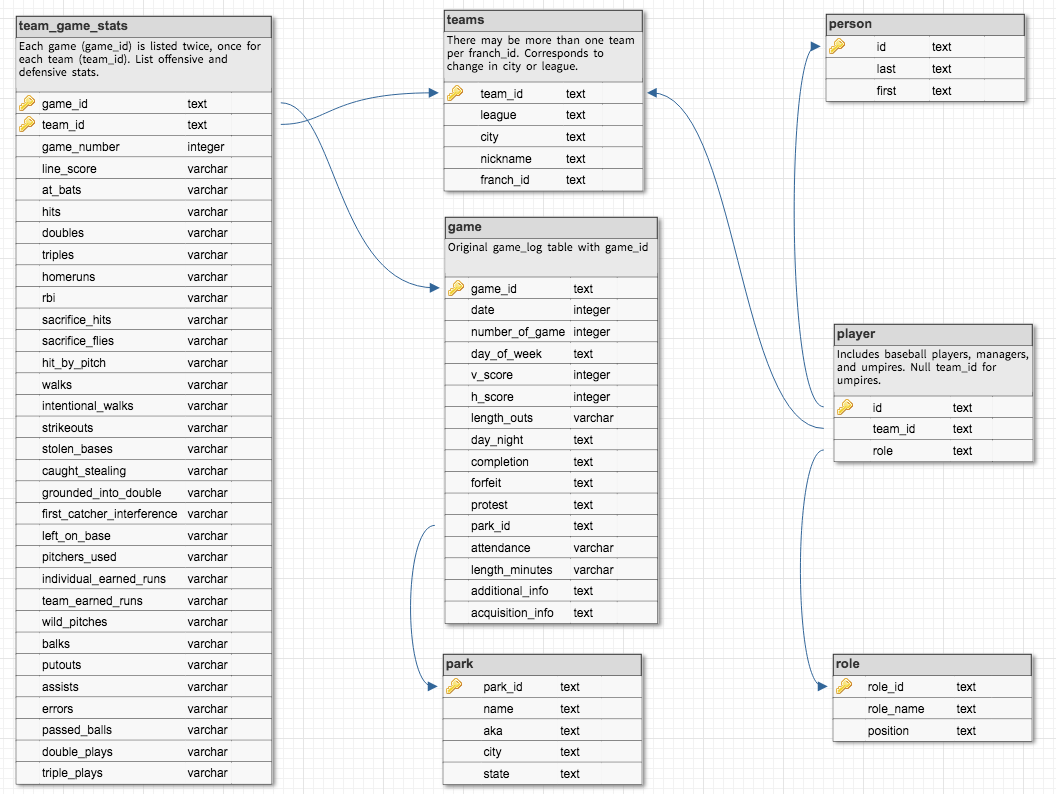

We will be using schema provided by DataQuest.



# Creating the Tables from the Schema
## Creating Tables Without Foreign Key Relations

In [69]:
person_create_1 = '''
CREATE TABLE IF NOT EXISTS person (
    person_id text PRIMARY KEY,
    first_name text,
    last_name text
);'''

run_command(person_create_1)

person_create_2 = '''
INSERT OR IGNORE INTO person
SELECT
    id,
    first,
    last
FROM person_codes;'''

run_command(person_create_2)

run_query('''SELECT * FROM person LIMIT 5''')

,person_id,first_name,last_name
0,aardd001,David,Aardsma
1,aaroh101,Hank,Aaron
2,aarot101,Tommie,Aaron
3,aased001,Don,Aase
4,abada001,Andy,Abad


In [70]:
park_create_1 = '''
CREATE TABLE IF NOT EXISTS park (
    park_id text PRIMARY KEY,
    name text,
    nickname text,
    city text,
    state text,
    notes text
);'''

run_command(park_create_1)

park_create_2 = '''
INSERT OR IGNORE INTO park
SELECT
    park_id,
    name,
    aka,
    city,
    state,
    notes
FROM park_codes;'''

run_command(park_create_2)

run_query('''SELECT * FROM park LIMIT 5''')

,park_id,name,nickname,city,state,notes
0,ALB01,Riverside Park,None,Albany,NY,TRN:9/11/80;6/15&9/10/1881;5/16-5/18&5/30/1882
1,ALT01,Columbia Park,None,Altoona,PA,None
2,ANA01,Angel Stadium of Anaheim,Edison Field; Anaheim Stadium,Anaheim,CA,None
3,ARL01,Arlington Stadium,None,Arlington,TX,None
4,ARL02,Rangers Ballpark in Arlington,The Ballpark in Arlington; Ameriquest Fl,Arlington,TX,None


In [88]:
run_command('''DROP TABLE IF EXISTS league''')

league_create_1 = '''
CREATE TABLE IF NOT EXISTS league (
    league_id text PRIMARY KEY,
    name text
);'''

run_command(league_create_1)

league_create_2 = '''
INSERT OR IGNORE INTO league
VALUES
    ("NL", "National League"),
    ("AL", "American League"),
    ("FL", "Federal League"),
    ("AA", "American Association"),
    ("PL", "Players' League"),
    ("UA", "Union Association")
;'''

run_command(league_create_2)

run_query('''SELECT * FROM league''')

,league_id,name
0,NL,National League
1,AL,American League
2,FL,Federal League
3,AA,American Association
4,PL,Players' League
5,UA,Union Association


In [123]:
appearance_create_1 = '''
CREATE TABLE IF NOT EXISTS appearance_beta (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT
);'''

run_command(appearance_create_1)

In [124]:
appearance_type = pd.read_csv('appearance_type.csv')

with sqlite3.connect('mlb.db') as conn:
    conn.execute("DROP TABLE IF EXISTS {};".format('appearance_beta'))
    appearance_type.to_sql('appearance_beta', conn, index = False)

In [125]:
appearance_create_2 = '''
CREATE TABLE IF NOT EXISTS appearance_type (
    appearance_type_id TEXT PRIMARY KEY,
    name TEXT,
    category TEXT
);'''

run_command(appearance_create_2)

appearance_create_3 = '''
INSERT OR IGNORE INTO appearance_type
SELECT * FROM appearance_beta
'''

run_command(appearance_create_3)

run_query('''SELECT * FROM appearance_type''')

,appearance_type_id,name,category
0,O1,Batter 1,offense
1,O2,Batter 2,offense
2,O3,Batter 3,offense
3,O4,Batter 4,offense
4,O5,Batter 5,offense
5,O6,Batter 6,offense
6,O7,Batter 7,offense
7,O8,Batter 8,offense
8,O9,Batter 9,offense
9,D1,Pitcher,defense


## Adding the Team and Game Tables

In [89]:
run_command('''DROP TABLE IF EXISTS team''')

team_create_1 = '''
CREATE TABLE IF NOT EXISTS team (
    team_id TEXT PRIMARY KEY,
    league_id TEXT,
    city TEXT,
    nickname TEXT,
    franch_id TEXT,
    FOREIGN KEY (league_id) REFERENCES league(league_id)
);
'''

run_command(team_create_1)

team_create_2 = '''
INSERT OR IGNORE INTO team
SELECT
    team_id,
    league,
    city,
    nickname,
    franch_id
FROM team_codes;
'''

run_command(team_create_2)

run_query('''SELECT * FROM team LIMIT 5''')

,team_id,league_id,city,nickname,franch_id
0,ALT,UA,Altoona,Mountain Cities,ALT
1,ARI,NL,Arizona,Diamondbacks,ARI
2,BFN,NL,Buffalo,Bisons,BFN
3,BFP,PL,Buffalo,Bisons,BFP
4,BL1,None,Baltimore,Canaries,BL1


In [96]:
run_command('''DROP TABLE IF EXISTS game''')

game_create_1 = '''
CREATE TABLE IF NOT EXISTS game (
    game_id TEXT PRIMARY KEY,
    date TEXT,
    number_of_game INTEGER,
    park_id TEXT,
    length_outs INTEGER,
    day BOOLEAN,
    completion TEXT,
    forfeit TEXT,
    protest TEXT,
    attendance INTEGER,
    length_minutes INTEGER,
    additional_info TEXT,
    acquisition_info TEXT,
    FOREIGN KEY (park_id) REFERENCES park(park_id)
);
'''

run_command(game_create_1)

game_create_2 = '''
INSERT OR IGNORE INTO game
SELECT
    game_id,
    date,
    number_of_game,
    park_id,
    length_outs,
    CASE
        WHEN day_night = 'D' THEN 1
        WHEN day_night = 'N' THEN 0
        ELSE NULL
    END AS day,
    completion,
    forefeit,
    protest,
    attendance,
    length_minutes,
    additional_info,
    acquisition_info
FROM game_log;
'''

run_command(game_create_2)

run_query('''SELECT * FROM game LIMIT 5''')

,game_id,date,number_of_game,park_id,length_outs,day,completion,forfeit,protest,attendance,length_minutes,additional_info,acquisition_info
0,FW1187105040,18710504,0,FOR01,54,1,None,None,None,200,120,None,Y
1,WS3187105050,18710505,0,WAS01,54,1,None,None,None,5000,145,HTBF,Y
2,RC1187105060,18710506,0,RCK01,54,1,None,None,None,1000,140,None,Y
3,CH1187105080,18710508,0,CHI01,54,1,None,None,None,5000,150,None,Y
4,TRO187105090,18710509,0,TRO01,54,1,None,None,None,3250,145,HTBF,Y


## Team Appearance Table

In [97]:
run_query('''SELECT sql FROM sqlite_master
WHERE name = "game_log"
  AND type = "table";''')

sql
0  CREATE TABLE "game_log" (\n"date" INTEGER,\n  "number_of_game" INTEGER,\n  "day_of_week" TEXT,\n  "v_name" TEXT,\n  "v_league" TEXT,\n  "v_game_number" INTEGER,\n  "h_name" TEXT,\n  "h_league" TEXT,\n  "h_game_number" INTEGER,\n  "v_score" INTEGER,\n  "h_score" INTEGER,\n  "length_outs" REAL,\n  "day_night" TEXT,\n  "completion" TEXT,\n  "forefeit" TEXT,\n  "protest" TEXT,\n  "park_id" TEXT,\n  "attendance" REAL,\n  "length_minutes" REAL,\n  "v_line_score" TEXT,\n  "h_line_score" TEXT,\n  "v_at_bats" REAL,\n  "v_hits" REAL,\n  "v_doubles" REAL,\n  "v_triples" REAL,\n  "v_homeruns" REAL,\n  "v_rbi" REAL,\n  "v_sacrifice_hits" REAL,\n  "v_sacrifice_flies" REAL,\n  "v_hit_by_pitch" REAL,\n  "v_walks" REAL,\n  "v_intentional_walks" REAL,\n  "v_strikeouts" REAL,\n  "v_stolen_bases" REAL,\n  "v_caught_stealing" REAL,\n  "v_grounded_into_double" REAL,\n  "v_first_catcher_interference" REAL,\n  "v_left_on_base" REAL,\n  "v_pitchers_used" REAL,\n  "v_individual_earned_runs" REAL,\n  "v_team_earned_runs" REAL,\n  "v_wild_pitches" REAL,\n  "v_balks" REAL,\n  "v_putouts" REAL,\n  "v_assists" REAL,\n  "v_errors" REAL,\n  "v_passed_balls" REAL,\n  "v_double_plays" REAL,\n  "v_triple_plays" REAL,\n  "h_at_bats" REAL,\n  "h_hits" REAL,\n  "h_doubles" REAL,\n  "h_triples" REAL,\n  "h_homeruns" REAL,\n  "h_rbi" REAL,\n  "h_sacrifice_hits" REAL,\n  "h_sacrifice_flies" REAL,\n  "h_hit_by_pitch" REAL,\n  "h_walks" REAL,\n  "h_intentional_walks" REAL,\n  "h_strikeouts" REAL,\n  "h_stolen_bases" REAL,\n  "h_caught_stealing" REAL,\n  "h_grounded_into_double" REAL,\n  "h_first_catcher_interference" REAL,\n  "h_left_on_base" REAL,\n  "h_pitchers_used" REAL,\n  "h_individual_earned_runs" REAL,\n  "h_team_earned_runs" REAL,\n  "h_wild_pitches" REAL,\n  "h_balks" REAL,\n  "h_putouts" REAL,\n  "h_assists" REAL,\n  "h_errors" REAL,\n  "h_passed_balls" REAL,\n  "h_double_plays" REAL,\n  "h_triple_plays" REAL,\n  "hp_umpire_id" TEXT,\n  "hp_umpire_name" TEXT,\n  "1b_umpire_id" TEXT,\n  "1b_umpire_name" TEXT,\n  "2b_umpire_id" TEXT,\n  "2b_umpire_name" TEXT,\n  "3b_umpire_id" TEXT,\n  "3b_umpire_name" TEXT,\n  "lf_umpire_id" TEXT,\n  "lf_umpire_name" TEXT,\n  "rf_umpire_id" TEXT,\n  "rf_umpire_name" TEXT,\n  "v_manager_id" TEXT,\n  "v_manager_name" TEXT,\n  "h_manager_id" TEXT,\n  "h_manager_name" TEXT,\n  "winning_pitcher_id" TEXT,\n  "winning_pitcher_name" TEXT,\n  "losing_pitcher_id" TEXT,\n  "losing_pitcher_name" TEXT,\n  "saving_pitcher_id" TEXT,\n  "saving_pitcher_name" TEXT,\n  "winning_rbi_batter_id" TEXT,\n  "winning_rbi_batter_id_name" TEXT,\n  "v_starting_pitcher_id" TEXT,\n  "v_starting_pitcher_name" TEXT,\n  "h_starting_pitcher_id" TEXT,\n  "h_starting_pitcher_name" TEXT,\n  "v_player_1_id" TEXT,\n  "v_player_1_name" TEXT,\n  "v_player_1_def_pos" REAL,\n  "v_player_2_id" TEXT,\n  "v_player_2_name" TEXT,\n  "v_player_2_def_pos" REAL,\n  "v_player_3_id" TEXT,\n  "v_player_3_name" TEXT,\n  "v_player_3_def_pos" REAL,\n  "v_player_4_id" TEXT,\n  "v_player_4_name" TEXT,\n  "v_player_4_def_pos" REAL,\n  "v_player_5_id" TEXT,\n  "v_player_5_name" TEXT,\n  "v_player_5_def_pos" REAL,\n  "v_player_6_id" TEXT,\n  "v_player_6_name" TEXT,\n  "v_player_6_def_pos" REAL,\n  "v_player_7_id" TEXT,\n  "v_player_7_name" TEXT,\n  "v_player_7_def_pos" REAL,\n  "v_player_8_id" TEXT,\n  "v_player_8_name" TEXT,\n  "v_player_8_def_pos" REAL,\n  "v_player_9_id" TEXT,\n  "v_player_9_name" TEXT,\n  "v_player_9_def_pos" REAL,\n  "h_player_1_id" TEXT,\n  "h_player_1_name" TEXT,\n  "h_player_1_def_pos" REAL,\n  "h_player_2_id" TEXT,\n  "h_player_2_name" TEXT,\n  "h_player_2_def_pos" REAL,\n  "h_player_3_id" TEXT,\n  "h_player_3_name" TEXT,\n  "h_player_3_def_pos" REAL,\n  "h_player_4_id" TEXT,\n  "h_player_4_name" TEXT,\n  "h_player_4_def_pos" REAL,\n  "h_player_5_id" TEXT,\n  "h_player_5_name" TEXT,\n  "h_player_5_def_pos" REAL,\n  "h_player_6_id" TEXT,\n  "h_player_6_name" TEXT,\n  "h_player_6_def_pos" REAL,\n  "h_player_7_id" TEXT,\n  "h_player_7_name" TEXT,\n  "h_playe

In [99]:
team_appearance_1 = '''
CREATE TABLE IF NOT EXISTS team_appearance (
    team_id TEXT,
    game_id TEXT,
    home BOOLEAN,
    league_id TEXT,
    score INTEGER,
    line_score TEXT,
    at_bats INTEGER,
    hits INTEGER,
    doubles INTEGER,
    triples INTEGER,
    homeruns INTEGER,
    rbi INTEGER,
    sacrifice_hits INTEGER,
    sacrifice_flies INTEGER,
    hit_by_pitch INTEGER,
    walks INTEGER,
    intentional_walks INTEGER,
    strikeouts INTEGER,
    stolen_bases INTEGER,
    caught_stealing INTEGER,
    grounded_into_double INTEGER,
    first_catcher_interference INTEGER,
    left_on_base INTEGER,
    pitchers_used INTEGER,
    individual_earned_runs INTEGER,
    team_earned_runs INTEGER,
    wild_pitches INTEGER,
    balks INTEGER,
    putouts INTEGER,
    assists INTEGER,
    errors INTEGER,
    passed_balls INTEGER,
    double_plays INTEGER,
    triple_plays INTEGER,
    PRIMARY KEY (team_id, game_id),
    FOREIGN KEY (league_id) REFERENCES league(league_id)
    );'''

run_command(team_appearance_1)

In [101]:
team_appearance_2 = '''
INSERT OR IGNORE INTO team_appearance
    SELECT
        h_name,
        game_id,
        1 AS home,
        h_league,
        h_score,
        h_line_score,
        h_at_bats,
        h_hits,
        h_doubles,
        h_triples,
        h_homeruns,
        h_rbi,
        h_sacrifice_hits,
        h_sacrifice_flies,
        h_hit_by_pitch,
        h_walks,
        h_intentional_walks,
        h_strikeouts,
        h_stolen_bases,
        h_caught_stealing,
        h_grounded_into_double,
        h_first_catcher_interference,
        h_left_on_base,
        h_pitchers_used,
        h_individual_earned_runs,
        h_team_earned_runs,
        h_wild_pitches,
        h_balks,
        h_putouts,
        h_assists,
        h_errors,
        h_passed_balls,
        h_double_plays,
        h_triple_plays
    FROM game_log

UNION

    SELECT
        v_name,
        game_id,
        0 AS home,
        v_league,
        v_score,
        v_line_score,
        v_at_bats,
        v_hits,
        v_doubles,
        v_triples,
        v_homeruns,
        v_rbi,
        v_sacrifice_hits,
        v_sacrifice_flies,
        v_hit_by_pitch,
        v_walks,
        v_intentional_walks,
        v_strikeouts,
        v_stolen_bases,
        v_caught_stealing,
        v_grounded_into_double,
        v_first_catcher_interference,
        v_left_on_base,
        v_pitchers_used,
        v_individual_earned_runs,
        v_team_earned_runs,
        v_wild_pitches,
        v_balks,
        v_putouts,
        v_assists,
        v_errors,
        v_passed_balls,
        v_double_plays,
        v_triple_plays
    FROM game_log
'''

run_command(team_appearance_2)

run_query('''SELECT * FROM team_appearance LIMIT 5''')

,team_id,game_id,home,league_id,score,line_score,at_bats,hits,doubles,triples,homeruns,rbi,sacrifice_hits,sacrifice_flies,hit_by_pitch,walks,intentional_walks,strikeouts,stolen_bases,caught_stealing,grounded_into_double,first_catcher_interference,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_plays,triple_plays
0,ALT,ALT188404300,1,UA,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ALT,ALT188405020,1,UA,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,ALT,ALT188405030,1,UA,5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,ALT,ALT188405050,1,UA,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,ALT,ALT188405100,1,UA,9,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## Person Appearance Table

In [132]:
person_appearance_1 = '''
CREATE TABLE IF NOT EXISTS person_appearance (
    appearance_id INTEGER PRIMARY KEY,
    person_id TEXT,
    team_id TEXT,
    game_id TEXT,
    appearance_type_id TEXT,
    FOREIGN KEY (person_id) REFERENCES person(person_id),
    FOREIGN KEY (team_id) REFERENCES team(team_id),
    FOREIGN KEY (game_id) REFERENCES game(game_id),
    FOREIGN KEY (appearance_type_id) REFERENCES appearance_type(appearance_type_id)
);'''

run_command(person_appearance_1)

run_query('''SELECT * FROM person_appearance''')

,appearance_id,person_id,team_id,game_id,appearance_type_id


In [133]:
person_appearance_2 = '''
INSERT OR IGNORE INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
)
    SELECT
        game_id,
        NULL,
        hp_umpire_id,
        "UHP"
    FROM game_log
    WHERE hp_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        [1b_umpire_id],
        "U1B"
    FROM game_log
    WHERE [1b_umpire_id] IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        [2b_umpire_id],
        "U2B"
    FROM game_log
    WHERE [2b_umpire_id] IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        [3b_umpire_id],
        "U3B"
    FROM game_log
    WHERE [3b_umpire_id] IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        lf_umpire_id,
        "ULF"
    FROM game_log
    WHERE lf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        NULL,
        rf_umpire_id,
        "URF"
    FROM game_log
    WHERE rf_umpire_id IS NOT NULL

UNION

    SELECT
        game_id,
        h_name,
        h_manager_id,
        "MM"
    FROM game_log
    WHERE h_manager_id IS NOT NULL

UNION

    SELECT
        game_id,
        v_name,
        v_manager_id,
        "MM"
    FROM game_log
    WHERE v_manager_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            WHEN h_score < v_score THEN v_name
            ELSE NULL
        END AS team_id,
        winning_pitcher_id,
        "AWP"
    FROM game_log
    WHERE winning_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score < v_score THEN h_name
            WHEN h_score > v_score THEN v_name
            ELSE NULL
        END AS team_id,
        losing_pitcher_id,
        "ALP"
    FROM game_log
    WHERE losing_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            WHEN h_score < v_score THEN v_name
            ELSE NULL
        END AS team_id,
        saving_pitcher_id,
        "ASP"
    FROM game_log
    WHERE saving_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        CASE
            WHEN h_score > v_score THEN h_name
            WHEN h_score < v_score THEN v_name
            ELSE NULL
        END AS team_id,
        winning_rbi_batter_id,
        "AWB"
    FROM game_log
    WHERE winning_rbi_batter_id IS NOT NULL

UNION

    SELECT
        game_id,
        v_name,
        v_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE v_starting_pitcher_id IS NOT NULL

UNION

    SELECT
        game_id,
        h_name,
        h_starting_pitcher_id,
        "PSP"
    FROM game_log
    WHERE h_starting_pitcher_id IS NOT NULL
'''

run_command(person_appearance_2)

run_query('''SELECT * FROM person_appearance LIMIT 30''')

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,1,maplb901,None,ALT188404300,UHP
1,2,curte801,ALT,ALT188404300,MM
2,3,murpj104,ALT,ALT188404300,PSP
3,4,hodnc101,SLU,ALT188404300,PSP
4,5,sullt101,SLU,ALT188404300,MM
5,6,hoopm101,None,ALT188405020,UHP
6,7,curte801,ALT,ALT188405020,MM
7,8,learj102,ALT,ALT188405020,PSP
8,9,sullt101,SLU,ALT188405020,MM
9,10,taylb103,SLU,ALT188405020,PSP


In [134]:
template = """
INSERT INTO person_appearance (
    game_id,
    team_id,
    person_id,
    appearance_type_id
) 
    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "O{num}"
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL

UNION

    SELECT
        game_id,
        {hv}_name,
        {hv}_player_{num}_id,
        "D" || CAST({hv}_player_{num}_def_pos AS INT)
    FROM game_log
    WHERE {hv}_player_{num}_id IS NOT NULL;
"""

for hv in ["h","v"]:
    for num in range(1,10):
        query_vars = {
            "hv": hv,
            "num": num
        }
        # run commmand is a helper function which runs
        # a query against our database.
        run_command(template.format(**query_vars))

In [142]:
run_query('''SELECT * FROM person_appearance WHERE appearance_type_id = "D5" LIMIT 10''')

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,1646819,figgc001,ANA,ANA200406040,D5
1,1646821,figgc001,ANA,ANA200406050,D5
2,1646825,figgc001,ANA,ANA200406080,D5
3,1646831,figgc001,ANA,ANA200406110,D5
4,1646835,figgc001,ANA,ANA200406130,D5
5,1646907,figgc001,ANA,ANA200409100,D5
6,1646999,figgc001,ANA,ANA200506220,D5
7,1647011,figgc001,ANA,ANA200507060,D5
8,1647015,figgc001,ANA,ANA200507080,D5
9,1647017,figgc001,ANA,ANA200507090,D5


In [143]:
run_query('''SELECT * FROM person_appearance WHERE appearance_type_id = "O7" LIMIT 10''')

,appearance_id,person_id,team_id,game_id,appearance_type_id
0,3336176,spies001,ANA,ANA200004030,O7
1,3336178,spies001,ANA,ANA200004040,O7
2,3336180,spies001,ANA,ANA200004050,O7
3,3336182,cleme001,ANA,ANA200004070,O7
4,3336184,spies001,ANA,ANA200004080,O7
5,3336186,spies001,ANA,ANA200004090,O7
6,3336188,spies001,ANA,ANA200004100,O7
7,3336190,spies001,ANA,ANA200004110,O7
8,3336192,palmo001,ANA,ANA200004120,O7
9,3336194,spies001,ANA,ANA200004240,O7


In [144]:
run_command('''DROP TABLE appearance_beta''')
run_command('''DROP TABLE game_log''')
run_command('''DROP TABLE park_codes''')
run_command('''DROP TABLE team_codes''')
run_command('''DROP TABLE person_codes''')

In [145]:
show_tables()

,name,type
0,person,table
1,park,table
2,league,table
3,team,table
4,game,table
5,team_appearance,table
6,appearance_type,table
7,person_appearance,table
